# SVR using rbf kernal

In [4]:
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error
%matplotlib inline
import pickle

In [5]:
endpoint = 'https://min-api.cryptocompare.com/data/histoday'
res = requests.get(endpoint + '?fsym=BTC&tsym=USD&limit=2000')
df = pd.DataFrame(json.loads(res.content)['Data'])

In [6]:
df = df.drop(['conversionType', 'conversionSymbol'], axis = 1)

In [7]:
df.head()

,time,high,low,open,volumefrom,volumeto,close
0,1465344000,582.44,567.78,575.58,49604.16,2.870622e+07,580.51
1,1465430400,580.71,569.26,580.51,48613.35,2.801058e+07,574.69
2,1465516800,579.26,571.14,574.69,45501.86,2.629087e+07,577.89
3,1465603200,592.61,576.29,577.89,42217.02,2.479044e+07,591.60
4,1465689600,683.85,592.79,591.60,217379.53,1.396846e+08,666.55


In [8]:
df.tail()

,time,high,low,open,volumefrom,volumeto,close
1996,1637798400,59437.04,57056.64,57175.09,24221.47,1.412787e+09,58966.99
1997,1637884800,59201.95,53575.54,58966.99,60064.72,3.312563e+09,53788.22
1998,1637971200,55316.65,53668.95,53788.22,18504.73,1.010586e+09,54805.03
1999,1638057600,57475.26,53436.05,54805.03,21562.34,1.186995e+09,57331.41
2000,1638144000,58898.57,56752.37,57331.41,24291.54,1.399402e+09,58380.15


In [9]:
df = df.drop('time', axis = 1)

In [10]:
test_df = df[-30:]

In [11]:
X_test = test_df.iloc[:, [0, 1, 2, 3, 4]].values
y_test = test_df.iloc[:, [5]].values

In [12]:
from sklearn.preprocessing import StandardScaler

sc_X_test = StandardScaler()
X_test = sc_X_test.fit_transform(X_test)

sc_y_test = StandardScaler()
y_test = sc_y_test.fit_transform(y_test)

In [13]:
train_df = df[:len(df)-30]

In [14]:
X = train_df.iloc[:, [0, 1, 2, 3, 4]].values
y = train_df.iloc[:, [5]].values

In [15]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [16]:
sc_y = StandardScaler()
y = sc_y.fit_transform(y)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [18]:
from sklearn.svm import SVR
# Create and train the Support Vector Machine 
svr_rbf = SVR(kernel='rbf', C=1000)#Create the model
svr_rbf.fit(X_train, y_train) #Train the model

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR(C=1000)

In [20]:
# save the model to disk
filename = 'finalized_SVR_with_rbf_model.sav'
pickle.dump(svr_rbf, open(filename, 'wb'))

In [21]:
svr_rbf_confidence = svr_rbf.score(X_val, y_val)
print("svr_rbf accuracy: ", svr_rbf_confidence)

svr_rbf accuracy:  0.9959401002628773


In [22]:
# Print the predicted value
y_val_prediction = svr_rbf.predict(X_val)
y_val_prediction = sc_y_test.inverse_transform(y_val_prediction)

#get the actual values
y_val_test = sc_y_test.inverse_transform(y_val)

In [23]:
print(np.concatenate((y_val_prediction.reshape(len(y_val_prediction),1), y_val_test.reshape(len(y_val_test),1)),1))

[[58419.48032152 58599.11580917]
 [58283.55364807 58092.51505306]
 [59224.52155558 59542.2892641 ]
 [58339.56070326 58105.37711489]
 [58929.14461953 59172.44123897]
 [59378.00700191 59636.67460692]
 [59088.27074886 59402.93609482]
 [58386.96278113 58130.00776803]
 [60000.41562373 60085.89802452]
 [58823.22476015 59151.09329459]
 [58260.45160881 58098.43036101]
 [58171.95213593 58114.88525454]
 [59057.81822752 59302.35748201]
 [60542.06016504 60213.56300473]
 [59778.12284072 59944.6519567 ]
 [60897.02632046 60897.03950879]
 [60490.7370397  60634.53996541]
 [58287.75002869 58246.95857493]
 [59185.06018058 59477.06236937]
 [60829.57844834 60606.86091862]
 [72164.07077178 72261.51765712]
 [69115.91976011 69237.70641834]
 [62334.8199567  62275.79326912]
 [59096.81369991 59377.90802487]
 [60237.06016513 60439.27507567]
 [58922.98702139 59140.24588327]
 [60024.21516675 60227.43583763]
 [59173.8283046  59506.04393251]
 [60872.3932449  60925.54555009]
 [58571.72825246 58778.00620763]
 [60442.36

In [24]:
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('price [USD]', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16)

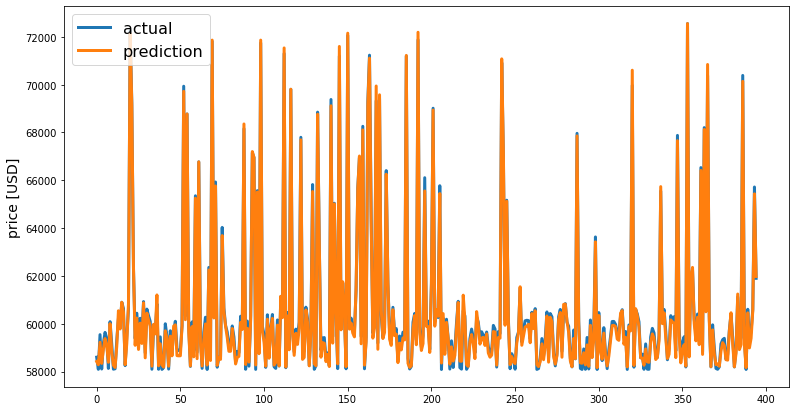

In [25]:
line_plot(y_val_test, y_val_prediction, 'actual', 'prediction', lw=3)

# test data

In [26]:
# Print the predicted value
y_prediction = svr_rbf.predict(X_test)
y_prediction = sc_y_test.inverse_transform(y_prediction)

print()

#get the actual values
y_test = sc_y_test.inverse_transform(y_test)

In [27]:
print(np.concatenate((y_prediction.reshape(len(y_prediction),1), y_test.reshape(len(y_test),1)),1))

[[61473.66953018 61349.75      ]
 [61077.53205561 60960.98      ]
 [62180.43249348 63260.05      ]
 [62419.38382556 62929.93      ]
 [62290.77658926 61448.47      ]
 [61696.5144338  61019.66      ]
 [61038.14468663 61529.76      ]
 [62429.10953547 63302.78      ]
 [64984.33128492 67549.14      ]
 [66754.59831658 66939.24      ]
 [64947.40518203 64926.06      ]
 [64684.03584616 64820.8       ]
 [63565.91236887 64156.3       ]
 [64255.76251709 64409.56      ]
 [64486.5819694  65509.06      ]
 [64712.93213345 63614.06      ]
 [61969.97036765 60108.9       ]
 [60666.92783979 60365.6       ]
 [61715.9170159  56930.68      ]
 [59523.63571371 58136.22      ]
 [58613.30396836 59769.66      ]
 [59491.58863642 58700.83      ]
 [59969.21265132 56303.06      ]
 [59864.84466322 57566.6       ]
 [58613.37697491 57175.09      ]
 [58341.98221049 58966.99      ]
 [61967.11832782 53788.22      ]
 [61057.60917177 54805.03      ]
 [59860.80326274 57331.41      ]
 [58254.46482143 58380.15      ]]


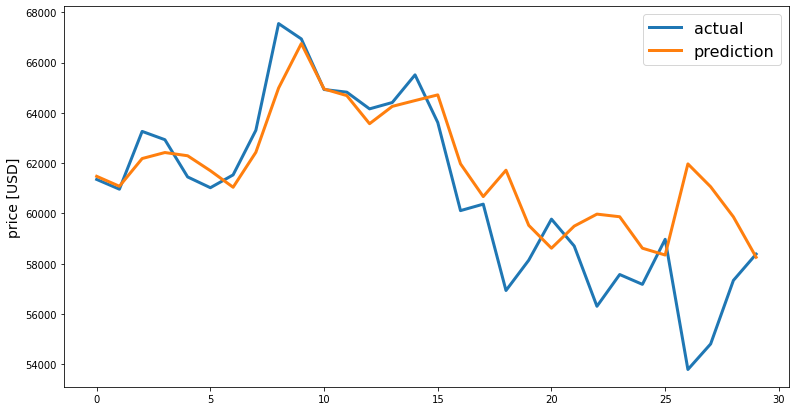

In [28]:
line_plot(y_test, y_prediction, 'actual', 'prediction', lw=3)

In [29]:
from sklearn.metrics import max_error

mre = max_error(y_test, y_prediction)
print("Maximum Residual Error :", mre)

Maximum Residual Error : 8178.898327820178


In [30]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_prediction)
print("Mean absolute Error :", mae)

Mean absolute Error : 1529.4863568372232


In [31]:
from sklearn.metrics import mean_squared_error
import math

mse = mean_squared_error(y_test, y_prediction)
rmse = math.sqrt(mse)
print("Mean Squered Error :", mse)
print("Root Mean Squered Error :",rmse)

Mean Squered Error : 5893645.778080007
Root Mean Squered Error : 2427.6832120521835


In [32]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_prediction)
print("R2 error", r2)

R2 error 0.5185348769491717


In [33]:

adjecent_r2 = 1 - (1-svr_rbf.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("adjecent R2 error", adjecent_r2)

adjecent R2 error -365.92794086055716
